In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import os

plt.style.use('bmh')
%matplotlib inline
%load_ext autoreload
%autoreload 2
%pwd

'/Users/rdole/Documents/nn_llm/algorithms_from_scratch'

In [2]:
import sys
sys.path.append('../src/')

## Table Of Contents:
* [Linear Regression](#first-bullet)
* [Logistic Regression](#second-bullet)

# A) Linear Regression <a class="anchor" id="first-bullet"></a>

# 1) Dataset

## a) Load Dataset

In [4]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=40000, n_features=6, noise=15, random_state=43)
print(X.shape, y.shape)

(40000, 6) (40000,)


In [5]:
df = pd.DataFrame(X, columns=[f'feature_{num}' for num in range(1, X.shape[1]+1)])
df['y'] = y
print(df.shape)
df.head(3)

(40000, 7)


,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,y
0,-0.407663,-1.219361,0.677434,-0.927683,1.574328,-1.150566,-105.688073
1,-0.724646,-0.399007,2.292309,-1.081191,-1.421466,-1.342321,-210.529219
2,0.779555,-0.010438,-0.369824,0.808981,0.919738,0.773617,133.623481


## b) Split into train and test

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43, shuffle=True)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(32000, 6) (32000,) (8000, 6) (8000,)


# 2) Perform EDA

In [65]:
## a) Check Distribution of 

# 3) Linear Regressor from Scratch

## a) From Scratch

In [22]:
learning_rate = 0.003
n_iter = 5000
import regressor_from_scratch
lin_reg = regressor_from_scratch.LinearRegression(learning_rate=learning_rate, n_iter=n_iter)
cost_list, iter_list = lin_reg.fit(X_train, y_train);

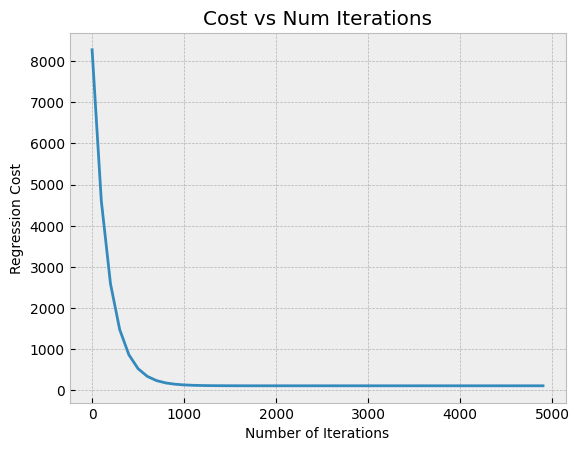

In [23]:
ax = sns.lineplot(x=iter_list, y=cost_list)
ax.set_xlabel('Number of Iterations');
ax.set_ylabel('Regression Cost');
ax.set_title('Cost vs Num Iterations');

In [24]:
from sklearn.metrics import mean_squared_error
y_pred_test = lin_reg.predict(X_test)
mean_squared_error(y_test, y_pred_test)

217.2243839958526

## b) Sklearn Lin reg

In [25]:
from sklearn.linear_model import LinearRegression
lin_reg_sk = LinearRegression()
lin_reg_sk.fit(X_train, y_train);

In [26]:
from sklearn.metrics import mean_squared_error
y_pred_test = lin_reg_sk.predict(X_test)
mean_squared_error(y_test, y_pred_test)

217.22435222604233

# 4) Error Residuals

In [27]:
from sklearn.metrics import r2_score
np.round(r2_score(y_train, lin_reg.predict(X_train)), 3), np.round(r2_score(y_test, y_pred_test), 3)

(0.987, 0.987)

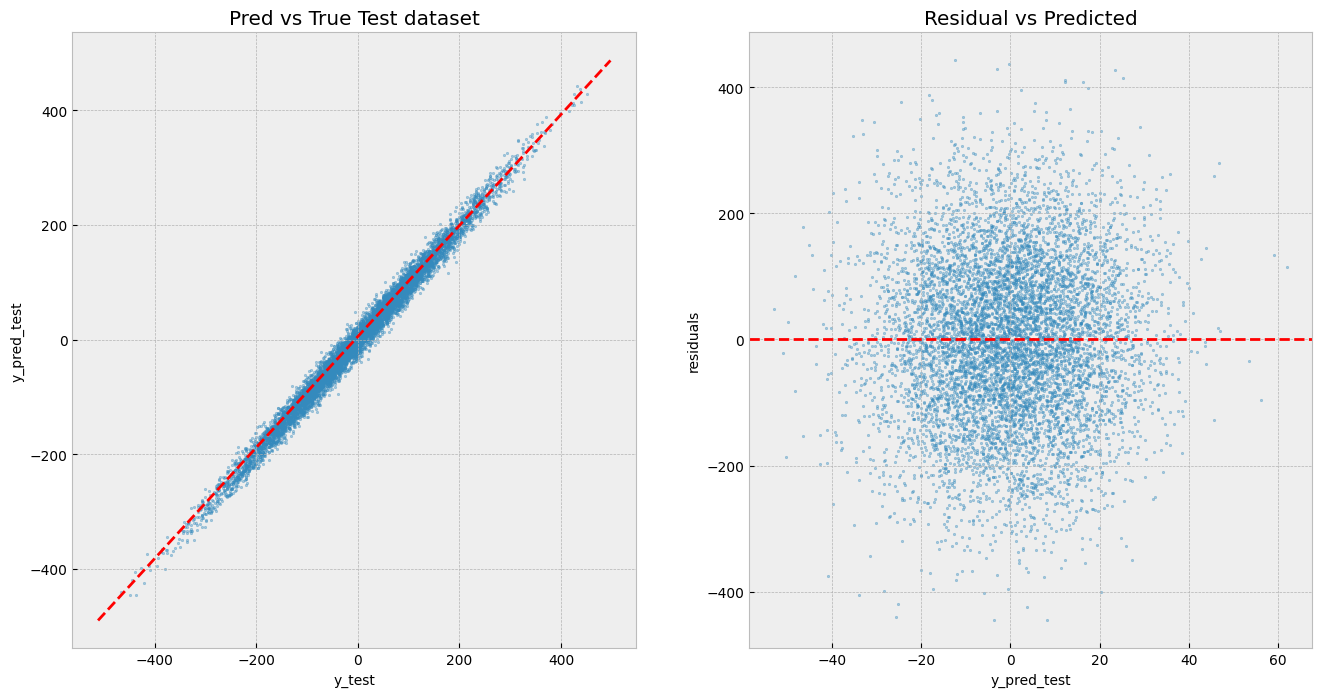

In [28]:
fig = plt.figure(figsize=(16, 8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

s = 3
alpha = 0.4
ax1.scatter(y_test, y_pred_test, s=s, alpha=alpha)
ax1.plot(ax1.get_xlim(), ax1.get_ylim(), ls='--', color='r')
ax2.scatter(y_test-y_pred_test, y_pred_test, s=s, alpha=alpha)
ax2.axhline(0, color='r', ls='--')

ax1.set_title('Pred vs True Test dataset');
ax2.set_title('Residual vs Predicted');

ax1.set_xlabel('y_test')
ax1.set_ylabel('y_pred_test');

ax2.set_xlabel('y_pred_test')
ax2.set_ylabel('residuals');

In [ ]:
# quantile regression
# nonlinear regression
# partial least squares regression
# ordinal regression
# poisson regression

#https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/Quantile%20Regression.ipynb

# B) Logistic Regression <a class="anchor" id="second-bullet"></a>

# 1) Load Data

In [76]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=40000, n_features=6, random_state=43, n_classes=2)
print(X.shape, y.shape)

(40000, 6) (40000,)


In [77]:
df = pd.DataFrame(X, columns=[f'feature_{num}' for num in range(1, X.shape[1]+1)])
df['y'] = y
print(df.shape)
df.head(3)

(40000, 7)


,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,y
0,-0.928261,0.685314,-0.374864,-2.105144,0.445021,1.795439,0
1,0.679678,0.774986,0.225522,-0.571919,-0.622809,0.710071,0
2,-2.632965,2.321064,1.148333,-0.395851,0.751252,1.165240,0


In [78]:
df.y.value_counts()

1    20002
0    19998
Name: y, dtype: int64

## b) Split into train and test

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43, shuffle=True)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(32000, 6) (32000,) (8000, 6) (8000,)


## c) Logistic Regressor from Scratch

In [80]:
learning_rate = 0.003
n_iter = 5000
import regressor_from_scratch
log_reg = regressor_from_scratch.LogisticRegression(learning_rate=learning_rate, n_iter=n_iter)
cost_list, iter_list = log_reg.fit(X_train, y_train);

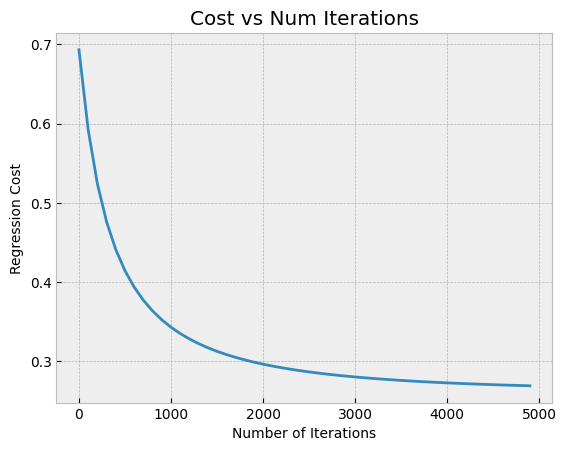

In [81]:
ax = sns.lineplot(x=iter_list, y=cost_list)
ax.set_xlabel('Number of Iterations');
ax.set_ylabel('Regression Cost');
ax.set_title('Cost vs Num Iterations');

In [82]:
from sklearn.metrics import accuracy_score
y_pred_test = log_reg.predict(X_test)
scratch_accuracy_score = accuracy_score(y_test, y_pred_test)
scratch_accuracy_score

0.90175

## d) Sklearn Logistic Regression

In [83]:
from sklearn.linear_model import LogisticRegression
log_reg_sk = LogisticRegression()
log_reg_sk.fit(X_train, y_train);

In [84]:
from sklearn.metrics import accuracy_score
y_pred_test = log_reg_sk.predict(X_test)
sk_accuracy_score = accuracy_score(y_test, y_pred_test)
sk_accuracy_score

0.9105

In [86]:
assert np.allclose(scratch_accuracy_score, sk_accuracy_score, 1e-2)